# **Flight Delay Prediction using Scikit-Learn Pipeline**

## **Overview**
This project demonstrates how to build a **machine learning pipeline** using scikit-learn to predict flight delays. The pipeline integrates data preprocessing with model training, ensuring efficient handling of both numerical and categorical data.

---

## **Objectives**
- Preprocess numerical and categorical data using `ColumnTransformer`.
- Automate the machine learning workflow using `Pipeline`.
- Train a **Random Forest Classifier** to predict flight delays.
- Optimize the model using **GridSearchCV** for hyperparameter tuning.

---

## **Data Overview**
- **Dataset**: Contains flight details such as:
  - **Year**, **Month**, **Day**
  - **Airline code**, **Origin airport code**, **Destination airport code**
  - **Departure delay** (target: delayed or not)

- **Target Variable**:  
  - `1` if the flight was delayed  
  - `0` if the flight was on time

---

## **Steps Involved**

### 1. **Data Loading and Exploration**
- Load the flight dataset and inspect its structure and missing values.

### 2. **Feature Engineering**
- **Numerical Features**:
  - `YEAR`, `MONTH`, `DAY`
- **Categorical Features**:
  - `AIRLINE__CODE`, `ORIGIN_AIRPORT_CODE`, `DESTINATION_AIRPORT_CODE`

### 3. **Preprocessing with `ColumnTransformer`**
- **Numerical Data**:
  - Impute missing values with the **mean**.
  - Standardize values using **`StandardScaler`**.
  
- **Categorical Data**:
  - Impute missing values with `'missing'`.
  - Encode using **`OneHotEncoder`**.

### 4. **Pipeline Setup**
- Use a **scikit-learn Pipeline** to link preprocessing and model training.
- Integrate a **Random Forest Classifier** within the pipeline.

### 5. **Model Training and Evaluation**
- Split the data into **train (70%)** and **test (30%)** sets.
- Evaluate the model using a **classification report** with metrics like:
  - **Precision**, **Recall**, **F1-score**

### 6. **Hyperparameter Tuning with GridSearchCV**
- Tune hyperparameters of the Random Forest model:
  - Number of estimators (`n_estimators`)
  - Maximum tree depth (`max_depth`)

### 7. **Model Persistence**
- Save the trained model using **`joblib`** for later use.

---

## **Technologies Used**
- **Python**: Programming language
- **Pandas**: Data manipulation and cleaning
- **Scikit-Learn**: Machine learning, preprocessing, and model evaluation
- **Joblib**: Model persistence
- **Jupyter Notebook**: Interactive development environment

---

## **Expected Output**
- A **trained Random Forest model** to predict flight delays.
- **Performance metrics** (accuracy, precision, recall) from the classification report.
- A **saved model** (`flight_delay_classifier.pkl`) for deployment.

---

## **Conclusion**
This project demonstrates how to create an automated **machine learning workflow** using scikit-learn’s `Pipeline` and `ColumnTransformer`. The streamlined preprocessing ensures consistency during both training and testing. With **hyperparameter tuning**, the model's performance is further optimized, making it reliable for real-world flight delay predictions.


# Upgrade pip and install all required packages

In [2]:
!pip install --upgrade pip

# Install Snowflake connectors, pandas integration, and essential libraries
!pip install "snowflake-connector-python[pandas]" \
             snowflake-snowpark-python==1.12.0,<2,>=1.11.1 \
             python-dateutil tqdm holidays faker
!pip install numpy pandas matplotlib scikit-learn xgboost seaborn \

# Ensure Snowpark Python is up-to-date
!pip install --upgrade -q snowflake-snowpark-python==1.12.0,<2,>=1.11.1


# Fix potential urllib3 version conflicts
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

# Additional installations for your project
!pip install fosforml==1.1.5
!pip install python-scipy
!pip install cloudpickle==2.2.1
!pip install basemap
!pip install scikit-learn==1.4


/usr/bin/sh: line 1: 2,: No such file or directory
/usr/bin/sh: line 1: 2,: No such file or directory
Found existing installation: urllib3 1.26.15
Uninstalling urllib3-1.26.15:
  Successfully uninstalled urllib3-1.26.15
  Using cached urllib3-1.26.15-py2.py3-none-any.whl.metadata (48 kB)
Using cached urllib3-1.26.15-py2.py3-none-any.whl (140 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snowflake-ml-python 1.5.0 requires scikit-learn<1.4,>=1.2.1, but you have scikit-learn 1.4.0 which is incompatible.
  Using cached scikit_learn-1.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstall

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.4.0.


# Importing necessary libraries and settings

In [4]:

# Standard libraries for date and warnings
import datetime
import warnings

# Scientific and Data Manipulation Libraries
import scipy
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Sklearn Modules for Data Preprocessing, Modeling, and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables
from sklearn.preprocessing import StandardScaler  # Scaling numerical data
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.metrics import roc_auc_score, classification_report  # Evaluation metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

import configparser
from dateutil.relativedelta import relativedelta
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Configuring display options and warning filters
pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")

# Custom FosforML package for Snowflake session and model registration
from fosforml.model_manager.snowflakesession import get_session
from fosforml import register_model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [5]:
# Set Matplotlib's default font family to 'DeJavu Serif' to ensure a consistent font style across plots
plt.rcParams['font.family'] = 'DeJavu Serif'

# Establishing a Snowflake session


In [6]:
my_session = get_session()

import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes['data'], columns= diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [8]:
my_session = get_session()

# Defining the table name to fetch data from
# table_name = 'FLIGHTS'  # Initial option for table
table_name = 'FLIGHTS_FULL'  # Final table to be used

# Querying the data from the specified Snowflake table
sf_df = my_session.sql("SELECT * FROM {}".format(table_name))

# Converting the Snowflake DataFrame to a pandas DataFrame for local processing
df = sf_df.to_pandas()

df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
0,2024,7,9,4,OO,5625,N971SW,SFO,BFL,1551,1541.0,-10.0,30.0,1611.0,77.0,81.0,45.0,238,1656.0,6.0,1708,1702.0,-6.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Skywest Airlines Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Meadows Field,Bakersfield,CA,USA,35.43360,-119.05677
1,2024,7,9,4,AA,2421,N5EPAA,STT,MIA,1552,1548.0,-4.0,10.0,1558.0,173.0,164.0,145.0,1107,1823.0,9.0,1845,1832.0,-13.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,American Airlines Inc.,Cyril E. King Airport,Charlotte Amalie,VI,USA,18.33731,-64.97336,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
2,2024,7,9,4,DL,766,N752AT,DTW,SAN,1552,1638.0,46.0,18.0,1656.0,278.0,275.0,253.0,1956,1809.0,4.0,1730,1813.0,43.0,0,0,None,0.0,0.0,43.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
3,2024,7,9,4,UA,809,N476UA,SNA,DEN,1552,1549.0,-3.0,12.0,1601.0,138.0,154.0,133.0,846,1914.0,9.0,1910,1923.0,13.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,United Air Lines Inc.,John Wayne Airport (Orange County Airport),Santa Ana,CA,USA,33.67566,-117.86822,Denver International Airport,Denver,CO,USA,39.85841,-104.66700
4,2024,7,9,4,UA,1925,N73270,FLL,DEN,1552,1631.0,39.0,15.0,1646.0,257.0,NaN,NaN,1703,2120.0,9.0,1809,2129.0,NaN,1,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,United Air Lines Inc.,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275,Denver International Airport,Denver,CO,USA,39.85841,-104.66700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2024,7,9,4,OO,6477,N117SY,ORD,DFW,1551,1548.0,-3.0,19.0,1607.0,149.0,175.0,145.0,802,1832.0,11.0,1820,1843.0,23.0,0,0,None,23.0,0.0,0.0,0.0,0.0,2024-07-09,Skywest Airlines Inc.,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
5819075,2024,7,9,4,OO,6498,N110SY,BOI,LAX,1551,1610.0,19.0,12.0,1622.0,139.0,126.0,103.0,674,1705.0,11.0,1710,1716.0,6.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Skywest Airlines Inc.,Boise Airport (Boise Air Terminal),Boise,ID,USA,43.56444,-116.22278,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
5819076,2024,7,9,4,EV,2675,N908EV,JAN,DFW,1551,1550.0,-1.0,10.0,1600.0,94.0,94.0,70.0,408,1710.0,14.0,1725,1724.0,-1.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Atlantic Southeast Airlines,Jackson-Evers International Airport,Jackson,MS,USA,32.31117,-90.07589,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
5819077,2024,7,9,4,EV,5135,N759EV,RST,MSP,1551,1548.0,-3.0,24.0,1612.0,46.0,56.0,25.0,76,1637.0,7.0,1637,1644.0,7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Atlantic Southeast Airlines,Rochester International Airport,Rochester,MN,USA,43.90883,-92.49799,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692


# Filtering data for specific airlines

In [9]:
# Defining the list of airlines to include in the filtered DataFrame
options = ['Southwest Airlines Co.', 'Delta Air Lines Inc.']

#df.replace({'AIRLINE':'Southwest Airlines Co.'}, {'AIRLINE': 'Southwest airlines'}, regex=True)
#df.replace({'AIRLINE':'Delta Air Lines Inc.'}, {'AIRLINE': 'Delta airlines'}, regex=True)

# Selecting rows where the 'AIRLINE' column matches one of the specified airlines
flights = df.loc[df['AIRLINE'].isin(options)]
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
2,2024,7,9,4,DL,766,N752AT,DTW,SAN,1552,1638.0,46.0,18.0,1656.0,278.0,275.0,253.0,1956,1809.0,4.0,1730,1813.0,43.0,0,0,None,0.0,0.0,43.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
9,2024,7,9,4,DL,1369,N968AT,DTW,MCI,1553,1727.0,94.0,17.0,1744.0,118.0,113.0,91.0,629,1815.0,5.0,1651,1820.0,89.0,0,0,None,0.0,0.0,89.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Kansas City International Airport,Kansas City,MO,USA,39.29761,-94.71391
30,2024,7,9,4,DL,1277,N980DL,ATL,MSY,1555,1600.0,5.0,18.0,1618.0,98.0,86.0,59.0,425,1617.0,9.0,1633,1626.0,-7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Louis Armstrong New Orleans International Airport,New Orleans,LA,USA,29.99339,-90.25803
31,2024,7,9,4,DL,1057,N906DE,DTW,CLT,1555,1549.0,-6.0,24.0,1613.0,109.0,106.0,73.0,500,1726.0,9.0,1744,1735.0,-9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
32,2024,7,9,4,DL,2483,N953DL,ATL,OKC,1555,1553.0,-2.0,23.0,1616.0,138.0,128.0,100.0,761,1656.0,5.0,1713,1701.0,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Will Rogers World Airport,Oklahoma City,OK,USA,35.39309,-97.60073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819055,2024,7,9,4,WN,268,N266WN,SNA,OAK,1550,1546.0,-4.0,10.0,1556.0,80.0,81.0,65.0,371,1701.0,6.0,1710,1707.0,-3.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,John Wayne Airport (Orange County Airport),Santa Ana,CA,USA,33.67566,-117.86822,Oakland International Airport,Oakland,CA,USA,37.72129,-122.22072
5819056,2024,7,9,4,WN,2427,N270WN,STL,DCA,1550,1608.0,18.0,11.0,1619.0,115.0,137.0,121.0,719,1920.0,5.0,1845,1925.0,40.0,0,0,None,22.0,0.0,0.0,18.0,0.0,2024-07-09,Southwest Airlines Co.,St. Louis International Airport at Lambert Field,St Louis,MO,USA,38.74769,-90.35999,Ronald Reagan Washington National Airport,Arlington,VA,USA,38.85208,-77.03772
5819057,2024,7,9,4,WN,2602,N796SW,ORF,BWI,1550,1602.0,12.0,13.0,1615.0,55.0,52.0,35.0,159,1650.0,4.0,1645,1654.0,9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Norfolk International Airport,Norfolk,VA,USA,36.89461,-76.20122,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820
5819071,2024,7,9,4,DL,1543,N341NB,DTW,OMA,1551,1548.0,-3.0,15.0,1603.0,121.0,111.0,94.0,651,1637.0,2.0,1652,1639.0,-13.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Eppley Airfield,Omaha,NE,USA,41.30252,-95.89417


In [10]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
2,2024,7,9,4,DL,766,N752AT,DTW,SAN,1552,1638.0,46.0,18.0,1656.0,278.0,275.0,253.0,1956,1809.0,4.0,1730,1813.0,43.0,0,0,None,0.0,0.0,43.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
9,2024,7,9,4,DL,1369,N968AT,DTW,MCI,1553,1727.0,94.0,17.0,1744.0,118.0,113.0,91.0,629,1815.0,5.0,1651,1820.0,89.0,0,0,None,0.0,0.0,89.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Kansas City International Airport,Kansas City,MO,USA,39.29761,-94.71391
30,2024,7,9,4,DL,1277,N980DL,ATL,MSY,1555,1600.0,5.0,18.0,1618.0,98.0,86.0,59.0,425,1617.0,9.0,1633,1626.0,-7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Louis Armstrong New Orleans International Airport,New Orleans,LA,USA,29.99339,-90.25803
31,2024,7,9,4,DL,1057,N906DE,DTW,CLT,1555,1549.0,-6.0,24.0,1613.0,109.0,106.0,73.0,500,1726.0,9.0,1744,1735.0,-9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
32,2024,7,9,4,DL,2483,N953DL,ATL,OKC,1555,1553.0,-2.0,23.0,1616.0,138.0,128.0,100.0,761,1656.0,5.0,1713,1701.0,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Will Rogers World Airport,Oklahoma City,OK,USA,35.39309,-97.60073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819055,2024,7,9,4,WN,268,N266WN,SNA,OAK,1550,1546.0,-4.0,10.0,1556.0,80.0,81.0,65.0,371,1701.0,6.0,1710,1707.0,-3.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,John Wayne Airport (Orange County Airport),Santa Ana,CA,USA,33.67566,-117.86822,Oakland International Airport,Oakland,CA,USA,37.72129,-122.22072
5819056,2024,7,9,4,WN,2427,N270WN,STL,DCA,1550,1608.0,18.0,11.0,1619.0,115.0,137.0,121.0,719,1920.0,5.0,1845,1925.0,40.0,0,0,None,22.0,0.0,0.0,18.0,0.0,2024-07-09,Southwest Airlines Co.,St. Louis International Airport at Lambert Field,St Louis,MO,USA,38.74769,-90.35999,Ronald Reagan Washington National Airport,Arlington,VA,USA,38.85208,-77.03772
5819057,2024,7,9,4,WN,2602,N796SW,ORF,BWI,1550,1602.0,12.0,13.0,1615.0,55.0,52.0,35.0,159,1650.0,4.0,1645,1654.0,9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Norfolk International Airport,Norfolk,VA,USA,36.89461,-76.20122,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820
5819071,2024,7,9,4,DL,1543,N341NB,DTW,OMA,1551,1548.0,-3.0,15.0,1603.0,121.0,111.0,94.0,651,1637.0,2.0,1652,1639.0,-13.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Eppley Airfield,Omaha,NE,USA,41.30252,-95.89417


In [11]:
flights = flights.dropna(subset = 'ARRIVAL_DELAY')

In [48]:
flights_needed_data = flights.head(10000)

In [49]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
2,2024,7,9,4,DL,766,N752AT,DTW,SAN,1552,1638.0,46.0,18.0,1656.0,278.0,275.0,253.0,1956,1809.0,4.0,1730,1813.0,43.0,0,0,None,0.0,0.0,43.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
9,2024,7,9,4,DL,1369,N968AT,DTW,MCI,1553,1727.0,94.0,17.0,1744.0,118.0,113.0,91.0,629,1815.0,5.0,1651,1820.0,89.0,0,0,None,0.0,0.0,89.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Kansas City International Airport,Kansas City,MO,USA,39.29761,-94.71391
30,2024,7,9,4,DL,1277,N980DL,ATL,MSY,1555,1600.0,5.0,18.0,1618.0,98.0,86.0,59.0,425,1617.0,9.0,1633,1626.0,-7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Louis Armstrong New Orleans International Airport,New Orleans,LA,USA,29.99339,-90.25803
31,2024,7,9,4,DL,1057,N906DE,DTW,CLT,1555,1549.0,-6.0,24.0,1613.0,109.0,106.0,73.0,500,1726.0,9.0,1744,1735.0,-9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
32,2024,7,9,4,DL,2483,N953DL,ATL,OKC,1555,1553.0,-2.0,23.0,1616.0,138.0,128.0,100.0,761,1656.0,5.0,1713,1701.0,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Will Rogers World Airport,Oklahoma City,OK,USA,35.39309,-97.60073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26906,2024,7,11,6,WN,4446,N435WN,MCI,SEA,830,824.0,-6.0,10.0,834.0,230.0,229.0,214.0,1489,1008.0,5.0,1020,1013.0,-7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-11,Southwest Airlines Co.,Kansas City International Airport,Kansas City,MO,USA,39.29761,-94.71391,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
26907,2024,7,11,6,WN,1600,N738CB,MCO,ORF,830,825.0,-5.0,14.0,839.0,110.0,110.0,91.0,655,1010.0,5.0,1020,1015.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-11,Southwest Airlines Co.,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603,Norfolk International Airport,Norfolk,VA,USA,36.89461,-76.20122
26908,2024,7,11,6,WN,2631,N746SW,MDW,HOU,830,825.0,-5.0,26.0,851.0,155.0,152.0,121.0,937,1052.0,5.0,1105,1057.0,-8.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-11,Southwest Airlines Co.,Chicago Midway International Airport,Chicago,IL,USA,41.78598,-87.75242,William P. Hobby Airport,Houston,TX,USA,29.64542,-95.27889
26909,2024,7,11,6,WN,30,N281WN,MDW,OAK,830,824.0,-6.0,16.0,840.0,280.0,274.0,247.0,1844,1047.0,11.0,1110,1058.0,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-11,Southwest Airlines Co.,Chicago Midway International Airport,Chicago,IL,USA,41.78598,-87.75242,Oakland International Airport,Oakland,CA,USA,37.72129,-122.22072


# Creating a copy of the filtered flights data

In [50]:
flights_needed_data.shape
#(2137736, 45)

(10000, 45)

In [ ]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2 to 26910
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   YEAR                      10000 non-null  int16  
 1   MONTH                     10000 non-null  int8   
 2   DAY                       10000 non-null  int8   
 3   DAY_OF_WEEK               10000 non-null  int8   
 4   AIRLINE__CODE             10000 non-null  object 
 5   FLIGHT_NUMBER             10000 non-null  int16  
 6   TAIL_NUMBER               10000 non-null  object 
 7   ORIGIN_AIRPORT_CODE       10000 non-null  object 
 8   DESTINATION_AIRPORT_CODE  10000 non-null  object 
 9   SCHEDULED_DEPARTURE       10000 non-null  int16  
 10  DEPARTURE_TIME            10000 non-null  float64
 11  DEPARTURE_DELAY           10000 non-null  float64
 12  TAXI_OUT                  10000 non-null  float64
 13  WHEELS_OFF                10000 non-null  float64
 14  SCHEDULED_T

In [16]:
flights_needed_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
2,2024,7,9,4,DL,766,N752AT,DTW,SAN,1552,1638.0,46.0,18.0,1656.0,278.0,275.0,253.0,1956,1809.0,4.0,1730,1813.0,43.0,0,0,None,0.0,0.0,43.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
9,2024,7,9,4,DL,1369,N968AT,DTW,MCI,1553,1727.0,94.0,17.0,1744.0,118.0,113.0,91.0,629,1815.0,5.0,1651,1820.0,89.0,0,0,None,0.0,0.0,89.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Kansas City International Airport,Kansas City,MO,USA,39.29761,-94.71391
30,2024,7,9,4,DL,1277,N980DL,ATL,MSY,1555,1600.0,5.0,18.0,1618.0,98.0,86.0,59.0,425,1617.0,9.0,1633,1626.0,-7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Louis Armstrong New Orleans International Airport,New Orleans,LA,USA,29.99339,-90.25803
31,2024,7,9,4,DL,1057,N906DE,DTW,CLT,1555,1549.0,-6.0,24.0,1613.0,109.0,106.0,73.0,500,1726.0,9.0,1744,1735.0,-9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
32,2024,7,9,4,DL,2483,N953DL,ATL,OKC,1555,1553.0,-2.0,23.0,1616.0,138.0,128.0,100.0,761,1656.0,5.0,1713,1701.0,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Will Rogers World Airport,Oklahoma City,OK,USA,35.39309,-97.60073


# Function to categorize scheduled arrival times into time segments

In [17]:
def categorize_time(SCHEDULED_ARRIVAL):
    # Categorize based on scheduled arrival time in 24-hour format
    if 500 <= SCHEDULED_ARRIVAL < 800:
        return 'Early morning'
    elif 800 <= SCHEDULED_ARRIVAL < 1100:
        return 'Late morning'
    elif 1100 <= SCHEDULED_ARRIVAL < 1400:
        return 'Around noon'
    elif 1400 <= SCHEDULED_ARRIVAL < 1700:
        return 'Afternoon'
    elif 1700 <= SCHEDULED_ARRIVAL < 2000:
        return 'Evening'
    elif 2000 <= SCHEDULED_ARRIVAL < 2300:
        return 'Night'
    elif SCHEDULED_ARRIVAL >= 2300 or SCHEDULED_ARRIVAL < 200:
        return 'Late night'
    elif 200 <= SCHEDULED_ARRIVAL < 500:
        return 'Dawn'

# Apply categorize_time function to the 'SCHEDULED_ARRIVAL' column to create 'ARRIVAL_TIME_SEGMENT'
flights_needed_data['ARRIVAL_TIME_SEGMENT'] = flights_needed_data['SCHEDULED_ARRIVAL'].apply(categorize_time)


In [18]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE,ARRIVAL_TIME_SEGMENT
2,2024,7,9,4,DL,766,N752AT,DTW,SAN,1552,1638.0,46.0,18.0,1656.0,278.0,275.0,253.0,1956,1809.0,4.0,1730,1813.0,43.0,0,0,None,0.0,0.0,43.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966,Evening
9,2024,7,9,4,DL,1369,N968AT,DTW,MCI,1553,1727.0,94.0,17.0,1744.0,118.0,113.0,91.0,629,1815.0,5.0,1651,1820.0,89.0,0,0,None,0.0,0.0,89.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Kansas City International Airport,Kansas City,MO,USA,39.29761,-94.71391,Afternoon
30,2024,7,9,4,DL,1277,N980DL,ATL,MSY,1555,1600.0,5.0,18.0,1618.0,98.0,86.0,59.0,425,1617.0,9.0,1633,1626.0,-7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Louis Armstrong New Orleans International Airport,New Orleans,LA,USA,29.99339,-90.25803,Afternoon
31,2024,7,9,4,DL,1057,N906DE,DTW,CLT,1555,1549.0,-6.0,24.0,1613.0,109.0,106.0,73.0,500,1726.0,9.0,1744,1735.0,-9.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,Evening
32,2024,7,9,4,DL,2483,N953DL,ATL,OKC,1555,1553.0,-2.0,23.0,1616.0,138.0,128.0,100.0,761,1656.0,5.0,1713,1701.0,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,Will Rogers World Airport,Oklahoma City,OK,USA,35.39309,-97.60073,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2024,7,9,4,WN,232,N943WN,MSY,HOU,1610,1613.0,3.0,10.0,1623.0,70.0,66.0,49.0,302,1712.0,7.0,1720,1719.0,-1.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Louis Armstrong New Orleans International Airport,New Orleans,LA,USA,29.99339,-90.25803,William P. Hobby Airport,Houston,TX,USA,29.64542,-95.27889,Evening
281,2024,7,9,4,WN,3481,N962WN,ISP,TPA,1610,1605.0,-5.0,17.0,1622.0,180.0,168.0,147.0,1034,1849.0,4.0,1910,1853.0,-17.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,USA,40.79524,-73.10021,Tampa International Airport,Tampa,FL,USA,27.97547,-82.53325,Evening
282,2024,7,9,4,WN,4393,N926WN,LAS,SFO,1610,1620.0,10.0,15.0,1635.0,90.0,85.0,65.0,414,1740.0,5.0,1740,1745.0,5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Evening
283,2024,7,9,4,WN,334,N418WN,LAX,PHX,1610,1641.0,31.0,10.0,1651.0,80.0,72.0,54.0,370,1745.0,8.0,1730,1753.0,23.0,0,0,None,0.0,0.0,1.0,22.0,0.0,2024-07-09,Southwest Airlines Co.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806,Evening


In [19]:
flights['AIRLINE__CODE'].unique()

array(['DL', 'WN'], dtype=object)

In [20]:
flights_needed_data.value_counts('DIVERTED')

DIVERTED
0    100
Name: count, dtype: int64

In [21]:
flights_needed_data['FLIGHT_NUMBER'] = flights_needed_data['FLIGHT_NUMBER'].astype(str)

In [22]:
flights_needed_data['MONTH'] = flights_needed_data['MONTH'].astype(str)
flights_needed_data['DAY'] = flights_needed_data['DAY'].astype(str)
flights_needed_data['DAY_OF_WEEK'] = flights_needed_data['DAY_OF_WEEK'].astype(str)
flights_needed_data['DIVERTED'] = flights_needed_data['DIVERTED'].astype(str)
flights_needed_data['CANCELLED'] = flights_needed_data['CANCELLED'].astype(str)
flights_needed_data['CANCELLED'] = flights_needed_data['CANCELLED'].astype(str)

In [23]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2 to 284
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   YEAR                      100 non-null    int16  
 1   MONTH                     100 non-null    object 
 2   DAY                       100 non-null    object 
 3   DAY_OF_WEEK               100 non-null    object 
 4   AIRLINE__CODE             100 non-null    object 
 5   FLIGHT_NUMBER             100 non-null    object 
 6   TAIL_NUMBER               100 non-null    object 
 7   ORIGIN_AIRPORT_CODE       100 non-null    object 
 8   DESTINATION_AIRPORT_CODE  100 non-null    object 
 9   SCHEDULED_DEPARTURE       100 non-null    int16  
 10  DEPARTURE_TIME            100 non-null    float64
 11  DEPARTURE_DELAY           100 non-null    float64
 12  TAXI_OUT                  100 non-null    float64
 13  WHEELS_OFF                100 non-null    float64
 14  SCHEDULED_TIME 

In [24]:
flights_needed_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE__CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT_CODE', 'DESTINATION_AIRPORT_CODE',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'FLY_DATE', 'AIRLINE',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_COUNTRY',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DEST_AIRPORT', 'DEST_CITY',
       'DEST_STATE', 'DEST_COUNTRY', 'DEST_LATITUDE', 'DEST_LONGITUDE',
       'ARRIVAL_TIME_SEGMENT'],
      dtype='object')

# Correlations matrix

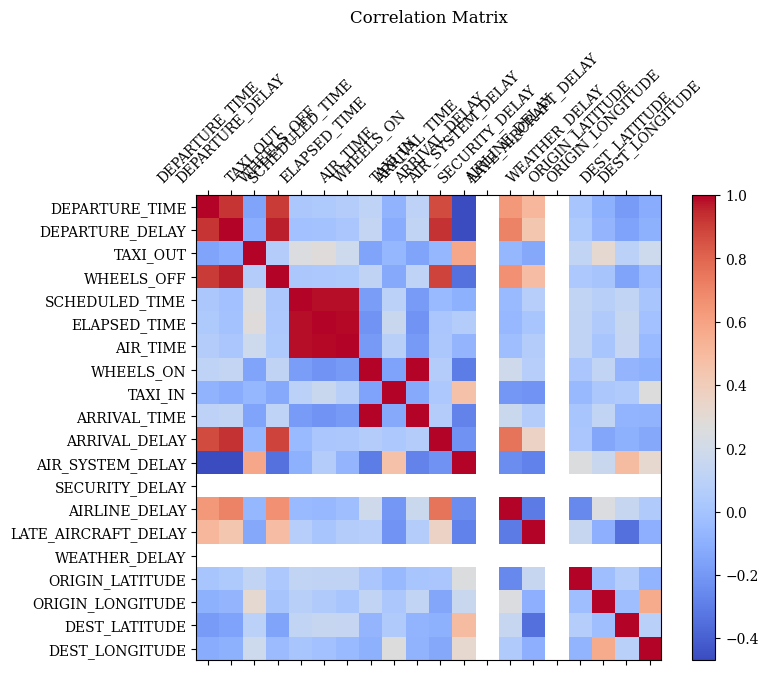

In [25]:
corr_matrix = flights_needed_data.select_dtypes([int, 'float']).corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix", pad=20)
plt.show()

In [26]:
# Set threshold values
target_corr_threshold = 0.2
feature_corr_threshold = 0.8

# Step 1: Select features with high correlation with the target
target_corr = corr_matrix['ARRIVAL_DELAY'].abs()
high_corr_features = target_corr[target_corr > target_corr_threshold].index.tolist()
high_corr_features.remove('ARRIVAL_DELAY')  # Remove the target itself

# Step 2: Filter out highly correlated features among selected features
filtered_features = high_corr_features.copy()
for feature in high_corr_features:
    for other_feature in high_corr_features:
        if feature != other_feature and corr_matrix[feature][other_feature] > feature_corr_threshold:
            if other_feature in filtered_features:
                filtered_features.remove(other_feature)

print("Selected features for model training:", filtered_features)

Selected features for model training: ['AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']


In [27]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    if contingency_table.size == 0:
        return np.nan 

    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

categorical_cols = flights_needed_data.select_dtypes(include=['object', 'category']).columns

cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0 
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(flights_needed_data[col1], flights_needed_data[col2])

print(cramers_v_matrix)

                         MONTH  DAY DAY_OF_WEEK AIRLINE__CODE FLIGHT_NUMBER  \
MONTH                      1.0  NaN         NaN           NaN           NaN   
DAY                        NaN  1.0         NaN           NaN           NaN   
DAY_OF_WEEK                NaN  NaN         1.0           NaN           NaN   
AIRLINE__CODE              NaN  NaN         NaN           1.0           1.0   
FLIGHT_NUMBER              NaN  NaN         NaN           1.0           1.0   
TAIL_NUMBER                NaN  NaN         NaN           1.0           1.0   
ORIGIN_AIRPORT_CODE        NaN  NaN         NaN      0.826914           1.0   
DESTINATION_AIRPORT_CODE   NaN  NaN         NaN      0.828817           1.0   
DIVERTED                   NaN  NaN         NaN           NaN           NaN   
CANCELLED                  NaN  NaN         NaN           NaN           NaN   
CANCELLATION_REASON        NaN  NaN         NaN           NaN           NaN   
FLY_DATE                   NaN  NaN         NaN     

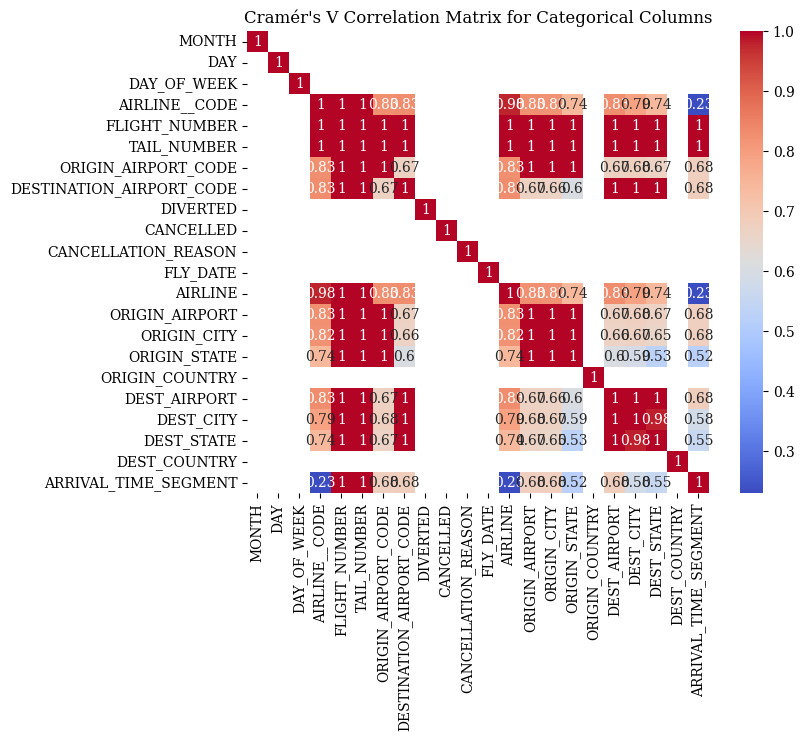

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Cramér's V Correlation Matrix for Categorical Columns")
plt.show()

In [29]:
cramers_v_matrix

,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,DIVERTED,CANCELLED,CANCELLATION_REASON,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,ARRIVAL_TIME_SEGMENT
MONTH,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_WEEK,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIRLINE__CODE,NaN,NaN,NaN,1.000000,1.0,1.0,0.826914,0.828817,NaN,NaN,NaN,NaN,0.978778,0.826914,0.820472,0.741995,NaN,0.828817,0.789475,0.739009,NaN,0.229534
FLIGHT_NUMBER,NaN,NaN,NaN,1.000000,1.0,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000
TAIL_NUMBER,NaN,NaN,NaN,1.000000,1.0,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000
ORIGIN_AIRPORT_CODE,NaN,NaN,NaN,0.826914,1.0,1.0,1.000000,0.671121,NaN,NaN,NaN,NaN,0.826914,1.000000,1.000000,1.000000,NaN,0.671121,0.677177,0.665827,NaN,0.676863
DESTINATION_AIRPORT_CODE,NaN,NaN,NaN,0.828817,1.0,1.0,0.671121,1.000000,NaN,NaN,NaN,NaN,0.828817,0.671121,0.663829,0.604631,NaN,1.000000,1.000000,1.000000,NaN,0.679583
DIVERTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANCELLED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
threshold = 0.6

high_association_columns = set()

for col in cramers_v_matrix.columns:
    high_values = cramers_v_matrix[col][cramers_v_matrix[col] > threshold]
    high_association_columns.update(high_values.index)

high_association_columns = list(high_association_columns)
print("Columns with Cramér's V > 0.5 with at least one other column:", high_association_columns)

Columns with Cramér's V > 0.5 with at least one other column: ['ORIGIN_CITY', 'DEST_COUNTRY', 'ORIGIN_COUNTRY', 'DEST_CITY', 'MONTH', 'ORIGIN_STATE', 'FLY_DATE', 'DEST_STATE', 'AIRLINE', 'DEST_AIRPORT', 'FLIGHT_NUMBER', 'ARRIVAL_TIME_SEGMENT', 'DAY', 'DESTINATION_AIRPORT_CODE', 'ORIGIN_AIRPORT', 'ORIGIN_AIRPORT_CODE', 'CANCELLATION_REASON', 'DIVERTED', 'CANCELLED', 'TAIL_NUMBER', 'AIRLINE__CODE', 'DAY_OF_WEEK']


# Define columns by data type

In [31]:
##numerical_cols = ['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
 #                 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
 #                 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
##categorical_cols = ['AIRLINE', 'ARRIVAL_TIME_SEGMENT']

numerical_cols = ['SCHEDULED_DEPARTURE', 'DISTANCE','SCHEDULED_ARRIVAL']                
#categorical_cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','TAIL_NUMBER',
#                    'AIRLINE', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'DEST_AIRPORT', 'DEST_CITY','ARRIVAL_TIME_SEGMENT']
categorical_cols = ['ORIGIN_AIRPORT', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT_CODE', 'AIRLINE', 'ORIGIN_CITY', 'DAY', 'DAY_OF_WEEK',
                    'DIVERTED', 'DESTINATION_AIRPORT_CODE', 'CANCELLED', 'MONTH', 'FLY_DATE', 'CANCELLATION_REASON', 'ORIGIN_COUNTRY',
                    'ORIGIN_STATE', 'ARRIVAL_TIME_SEGMENT', 'DEST_COUNTRY', 'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE',
                    'TAIL_NUMBER', 'AIRLINE__CODE']

# Creating the target column

In [32]:
# result = []
# for row in flights_needed_data['ARRIVAL_DELAY']:
#   if row > 5:
#     result.append(1)
#   else:
#     result.append(0) 

# flights_needed_data['delay_flag'] = result
# flights_needed_data.value_counts('delay_flag')

In [33]:
#test_data = flights_needed_data[flights_needed_data['MONTH'] >= 11] 
#test=test.drop(['FLY_DATE'], axis=1)
#train_data = flights_needed_data[flights_needed_data['MONTH'] < 11]

train_data  = flights_needed_data[flights_needed_data["MONTH"].apply(lambda x: '11' not in x and '12' not in x)]
test_data = flights_needed_data[flights_needed_data["MONTH"].apply(lambda x: '11' in x or '12' in x)]

In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   YEAR                      0 non-null      int16  
 1   MONTH                     0 non-null      object 
 2   DAY                       0 non-null      object 
 3   DAY_OF_WEEK               0 non-null      object 
 4   AIRLINE__CODE             0 non-null      object 
 5   FLIGHT_NUMBER             0 non-null      object 
 6   TAIL_NUMBER               0 non-null      object 
 7   ORIGIN_AIRPORT_CODE       0 non-null      object 
 8   DESTINATION_AIRPORT_CODE  0 non-null      object 
 9   SCHEDULED_DEPARTURE       0 non-null      int16  
 10  DEPARTURE_TIME            0 non-null      float64
 11  DEPARTURE_DELAY           0 non-null      float64
 12  TAXI_OUT                  0 non-null      float64
 13  WHEELS_OFF                0 non-null      float64
 14  SCHEDULED_TIME            0

In [35]:
# Replace 'target_column_name' with the actual name of your target column
X_train = train_data.drop(columns=['ARRIVAL_DELAY'])
y_train = train_data['ARRIVAL_DELAY']

# Replace 'target_column_name' with the actual name of your target column
X_test = test_data.drop(columns=['ARRIVAL_DELAY'])
y_test = test_data['ARRIVAL_DELAY']

In [36]:
X_train.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE__CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT_CODE', 'DESTINATION_AIRPORT_CODE',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'FLY_DATE', 'AIRLINE', 'ORIGIN_AIRPORT', 'ORIGIN_CITY',
       'ORIGIN_STATE', 'ORIGIN_COUNTRY', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE', 'DEST_COUNTRY',
       'DEST_LATITUDE', 'DEST_LONGITUDE', 'ARRIVAL_TIME_SEGMENT'],
      dtype='object')

In [37]:
# numerical_cols = [ 'DISTANCE','AIR_TIME']                
# categorical_cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','TAIL_NUMBER',
#                     'AIRLINE', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'DEST_AIRPORT', 'DEST_CITY','ARRIVAL_TIME_SEGMENT']
# ## should add flytime if rerunning again

In [38]:
##numerical_cols = ['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
 #                 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
 #                 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
##categorical_cols = ['AIRLINE', 'ARRIVAL_TIME_SEGMENT']

numerical_cols = ['SCHEDULED_DEPARTURE', 'DISTANCE','SCHEDULED_ARRIVAL', 'AIR_TIME']                
#categorical_cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','TAIL_NUMBER',
#                    'AIRLINE', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'DEST_AIRPORT', 'DEST_CITY','ARRIVAL_TIME_SEGMENT']
categorical_cols = ['ORIGIN_AIRPORT', 'FLIGHT_NUMBER', 'AIRLINE',  'DAY', 'DAY_OF_WEEK', 'MONTH',  'ARRIVAL_TIME_SEGMENT',
                    'DEST_COUNTRY', 'DEST_AIRPORT']

# Define transformations for numerical columns: imputing and scaling

In [39]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define transformations for categorical columns: imputing and one-hot encoding


In [40]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformations in a ColumnTransformer


In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create a full pipeline

In [45]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=250))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SCHEDULED_DEPARTURE',
                                                   'DISTANCE',
                                                   'SCHEDULED_ARRIVAL',
                                                   'AIR_TIME']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ORIGIN_AIRPORT',
                                                   'FLIGHT_NUMBER', 'AIRLINE',
                                                   'DAY', 'DAY_OF_WEEK',
                                                   'MONTH',
                                                   'ARRIVAL_TIME_SEGMENT',
                                                   'DEST_COUNTRY',
                                                   'DEST_AIRPORT'])])),
                ('regressor', RandomForestRegressor(n_estimators=250))])

In [46]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SCHEDULED_DEPARTURE',
                                                   'DISTANCE',
                                                   'SCHEDULED_ARRIVAL',
                                                   'AIR_TIME']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ORIGIN_AIRPORT',
                                                   'FLIGHT_NUMBER', 'AIRLINE',
                                                   'DAY', 'DAY_OF_WEEK',
                                                   'MONTH',
                                                   'ARRIVAL_TIME_SEGMENT',
                                                   'DEST_COUNTRY',
                                                   'DEST_AIRPORT'])])),
                ('regressor', RandomForestRegressor(n_estimators=250))])

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by SimpleImputer.

In [ ]:
import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"pipeline_model_{timestamp}.pkl"

joblib.dump(pipeline, filename)
print(f"Model saved as {filename}")

In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib
from datetime import datetime

param_grid = {
    'regressor__n_estimators': [75, 100, 150, 200, 250, 300],
    'regressor__max_depth': [10, 15, 20, 25, 30, None],
    'regressor__min_samples_split': [2, 5, 7, 10],
    'regressor__min_samples_leaf': [1, 2, 4, 7],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"best_pipeline_model_{timestamp}.pkl"

joblib.dump(best_model, filename)
print(f"Best model saved as {filename}")
print("Best parameters found:", grid_search.best_params_)


In [ ]:
## registering the model in Fosfor Insight Designer.
register_model(
    model_obj=best_estimator, 
    session=my_session,
    x_train=X_train_df,
    y_train=y_train_df,
    x_test=X_test_df,
    y_test=y_test_df,
    y_pred=y_pred_df,
    #y_prob=y_prob_df,
    source="Notebook",
    dataset_name="FLIGHTS",
    dataset_source="Snowflake",
    #dataset_source="InMemory",
    name="Decision_Tree_Delay_Classifier",
    description="Decision tree model trained via Notebook to identify Flight Delay application",
    flavour="sklearn",
    model_type="classification",
    conda_dependencies=["scikit-learn==1.3.2"]
)

In [ ]:
y_prob = pipeline.predict_proba(X_test)[:,1]

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
auc_score = roc_auc_score(y_test, y_pred)
auc_score

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = pipeline.predict(flights_needed_data)

In [ ]:
flights['ACTUAL_DELAY'] = flights_needed_data['result']
flights

In [ ]:
flights['PREDICTED_DELAY'] = y_pred

In [ ]:
flights

In [ ]:
    # Ensure no NaN values remain by explicitly replacing NaN with None
my_session.write_pandas(
        df=flights,
        table_name="DELAY_CLASSIFIER_OUTPUT_2510",
        database="TTH_DB",
        schema="TTH_AIRLINE_SCHEMA",
        auto_create_table=True
)

In [ ]:
flights = flights.where(pd.notnull(flights), None)

In [ ]:
flights.isna().sum()

In [ ]:
chunk_size = 1000000
chunks = [flights[i:i + chunk_size] for i in range(0, len(flights), chunk_size)]

for chunk in chunks:
    # Ensure no NaN values remain by explicitly replacing NaN with None
    chunk = chunk.where(pd.notnull(chunk), None)
    
    # # Explicitly set the data type of each column to object
    # for col in chunk.columns:
    #     chunk[col] = chunk[col].astype(object)

    # Convert the DataFrame to a Snowflake-compatible DataFrame
    ins_train_sf = my_session.createDataFrame(
        chunk.values.tolist(),
        schema=chunk.columns.tolist()
    )
    
    # Write to Snowflake
    ins_train_sf.write.mode("append").save_as_table("TTH_DB.TTH_AIRLINE_SCHEMA.DELAY_CLASSIFIER_OUTPUT_2510")

In [ ]:
len(chunks)

In [ ]:
flights.info()

In [ ]:
my_session.sql('''
CREATE TABLE IF NOT EXISTS TTH_DB.TTH_AIRLINE_SCHEMA.DELAY_CLASSIFIER_OUTPUT_2510 (
    YEAR                      INT  NULL,
    MONTH                     INT NULL,
    DAY                       INT NULL,
    DAY_OF_WEEK               INT NULL,
    AIRLINE__CODE             STRING NULL,
    FLIGHT_NUMBER             INT NULL,
    TAIL_NUMBER               STRING NULL,
    ORIGIN_AIRPORT_CODE       STRING NULL,
    DESTINATION_AIRPORT_CODE  STRING NULL,
    SCHEDULED_DEPARTURE       INT NULL,
    DEPARTURE_TIME            FLOAT NULL,
    DEPARTURE_DELAY           FLOAT NULL,
    TAXI_OUT                  FLOAT NULL,
    WHEELS_OFF                FLOAT NULL,
    SCHEDULED_TIME            FLOAT NULL,
    ELAPSED_TIME              FLOAT NULL,
    AIR_TIME                  FLOAT NULL,
    DISTANCE                  INT NULL,
    WHEELS_ON                 FLOAT NULL,
    TAXI_IN                   FLOAT NULL,
    SCHEDULED_ARRIVAL         INT NULL,
    ARRIVAL_TIME              FLOAT NULL,
    ARRIVAL_DELAY             FLOAT NULL,
    DIVERTED                  INT NULL,
    CANCELLED                 INT NULL,
    CANCELLATION_REASON       STRING NULL,
    AIR_SYSTEM_DELAY          FLOAT NULL,
    SECURITY_DELAY            FLOAT NULL,
    AIRLINE_DELAY             FLOAT NULL,
    LATE_AIRCRAFT_DELAY       FLOAT NULL,
    WEATHER_DELAY             FLOAT NULL,
    FLY_DATE                  STRING NULL,
    AIRLINE                   STRING NULL,
    ORIGIN_AIRPORT            STRING NULL,
    ORIGIN_CITY               STRING NULL,
    ORIGIN_STATE              STRING NULL,
    ORIGIN_COUNTRY            STRING NULL,
    ORIGIN_LATITUDE           FLOAT NULL,
    ORIGIN_LONGITUDE          FLOAT NULL,
    DEST_AIRPORT              STRING NULL,
    DEST_CITY                 STRING NULL,
    DEST_STATE                STRING NULL,
    DEST_COUNTRY              STRING NULL,
    DEST_LATITUDE             FLOAT NULL,
    DEST_LONGITUDE            FLOAT NULL,
    ACTUAL_DELAY              INT NULL,
    PREDICTED_DELAY           INT NULL
);

''').collect()

In [ ]:
my_session.sql('drop table  TTH_DB.TTH_AIRLINE_SCHEMA.DELAY_CLASSIFIER_OUTPUT_2510;').collect()

In [ ]:
my_session = get_session()

# Defining the table name to fetch data from
# table_name = 'FLIGHTS'  # Initial option for table
table_name = 'DELAY_CLASSIFIER_OUTPUT_2510'  # Final table to be used

# Querying the data from the specified Snowflake table
sf_df = my_session.sql("SELECT * FROM {}".format(table_name))

# Converting the Snowflake DataFrame to a pandas DataFrame for local processing
df = sf_df.to_pandas()

df

In [ ]:
df.isna().sum()